## Movie Review Sentiment

In [2]:
#import necessary libraries
 #import 1_____ custom model 
#Load and clean the text using NLTK
#Craete a bag of words vector(matrix)features (feature 1)
#create a TF-IDF Vector features (feature 2)
#create 2 naive bayes models based BOW and TF-IDF

#method 2 custom method 
#Pretrained model (VADER)
#Look at pretrained sentiment analyzer
#Leverage Vader for Sentiment analysis

#eveluate all models using test.csv




In [3]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [4]:
#load data train.csvas train 
train=pd.read_csv(r"C:\Users\Akolgo Matthew Asi\Desktop\10Alytics\CLASS VIDEOS\NLP\train.csv")

In [5]:
train.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [6]:
train['sentiment']

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
24995    pos
24996    pos
24997    neg
24998    neg
24999    neg
Name: sentiment, Length: 25000, dtype: object

In [7]:
len(train)

25000

<Axes: xlabel='count', ylabel='sentiment'>

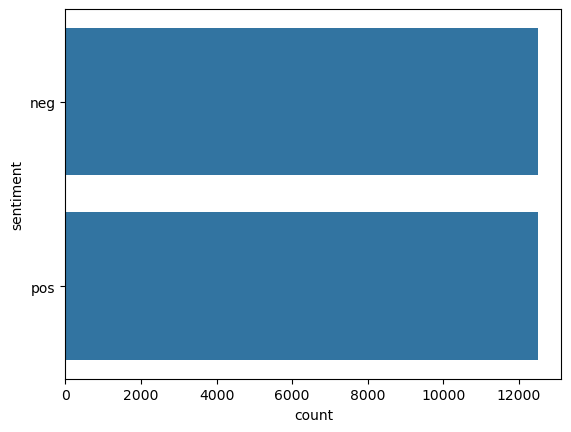

In [8]:
sns.countplot(train['sentiment'])

In [9]:
example=train['text'].iloc[12]

In [10]:
example

"My kids picked this out at the video store...it's great to hear Liza as Dorothy cause she sounds just like her mom. But there are too many bad songs, and the animation is pretty crude compared to other cartoons of that time."

In [11]:
train['sentiment'].iloc[7]

'neg'

In [12]:
#data cleaning
# !pip install nltk

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [14]:
!nltk.download("stopwords")

!nltk.download("punkt")

'nltk.download' is not recognized as an internal or external command,
operable program or batch file.
'nltk.download' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
stop_words=set(stopwords.words("english"))

In [16]:
word_tokens=word_tokenize(example)

In [17]:
word_tokens
[word for word in word_tokens]
filtered_text= [word for word in word_tokens if word.lower() not in stop_words]

In [18]:
#creating a function that will remove stopwords

def remove_stopwords(text):
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    filtered_text= [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)
    

stopwords.words("english")


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
remove_stopwords(train['text'].iloc[101])

"movie made upset ! think Cat hat . Im thinking cat hat books . know , one years back parents read thier children . Well , though movie would lot like ! much suprise nothing like books ! Insted like young adult humor movie . one part cat talking gardening tool ( hoe ) cat talks like hoe ( agin adult humor ) . naming car though little untastful kids movie . rating 'll find : mild cude humor double-entendres . think short means adult humor . wish could return movie ! wal-mart said would n't movie opened . thinking buying suggest maybe rent buy ."

In [20]:
!pip install tqdm
from tqdm import tqdm
tqdm.pandas()

In [21]:
train['text']

0        Now, I won't deny that when I purchased this o...
1        The saddest thing about this "tribute" is that...
2        Last night I decided to watch the prequel or s...
3        I have to admit that i liked the first half of...
4        I was not impressed about this film especially...
                               ...                        
24995    This film is fun, if your a person who likes a...
24996    After seeing this film I feel like I know just...
24997    first this deserves about 5 stars due to actin...
24998    If you like films that ramble with little plot...
24999    As interesting as a sheet of cardboard, this d...
Name: text, Length: 25000, dtype: object

In [22]:
train['cleaned_text']=train['text'].progress_apply(remove_stopwords)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:54<00:00, 457.02it/s]


In [23]:
train['cleaned_text'].iloc[8]

"Fast-paced , funny , sexy , spectacular . Cagney always terrific . Blondel charms wit energy . 's obvious pre-censorship film innuendo script , costumes , way touch . bikinis bikinis ! holds barred fun everyone . n't understand John Garfield issue though . matter whether 's film ? , screen short 's basically prop . need watch frame frame even find 's . 'm big Cagney fan , never seen one . found Turner Classics . found wonderful accident . Sit back enjoy ride !"

In [24]:
##lets create bag of words and tf-idf

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [25]:
vectorizer_bow = CountVectorizer()

In [26]:
bow_matrix=vectorizer_bow.fit_transform(train['cleaned_text'])

In [27]:
vectorizer_tfidf = TfidfVectorizer()

In [28]:
tfidf_matrix=vectorizer_tfidf.fit_transform(train['cleaned_text'])

In [29]:
tfidf_matrix

<25000x74833 sparse matrix of type '<class 'numpy.float64'>'
	with 2512790 stored elements in Compressed Sparse Row format>

## Create,Test and Train Models 

In [31]:
###Creating our Model 

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [32]:
#Niave bayes using Bag Of Words (BOW)

X_train_bow,X_test_bow,y_train,y_test = train_test_split(bow_matrix, train['sentiment'],test_size=0.1,random_state=42)

#for tfidf
X_train_tfidf,X_test_tfidf,y_train,y_test = train_test_split(bow_matrix, train['sentiment'],test_size=0.1,random_state=42)


In [33]:
## Training model on bag of words
nb_bow=MultinomialNB()

nb_bow.fit(X_train_bow,y_train )

MultinomialNB()

In [34]:
## Training model on tf idf
nb_tfidf=MultinomialNB()

nb_tfidf.fit(X_train_tfidf,y_train )

MultinomialNB()

In [35]:
y_predict_bow= nb_bow.predict(X_test_bow)

In [36]:
y_predict_tfidf= nb_tfidf.predict(X_test_tfidf)

In [37]:
accuracy_bow=accuracy_score(y_test,y_predict_bow)
print('accuracy_BOW')
print(accuracy_bow)
print(classification_report(y_test,y_predict_bow))


accuracy_BOW
0.8644
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



In [38]:
accuracy_tfidf=accuracy_score(y_test,y_predict_tfidf)
print('accuracy_TF-IDF')
print(accuracy_tfidf)
print(classification_report(y_test,y_predict_tfidf))

accuracy_TF-IDF
0.8644
              precision    recall  f1-score   support

         neg       0.85      0.89      0.87      1266
         pos       0.88      0.84      0.86      1234

    accuracy                           0.86      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.86      0.86      2500



In [39]:
## for second method
text = 'vader is a good tool for sentiment analysis'
text_1 = 'you are a bad boy'

import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Akolgo
[nltk_data]     Matthew Asi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
analyzer=SentimentIntensityAnalyzer()

In [42]:
analyzer.polarity_scores(text)

{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}

In [43]:
analyzer.polarity_scores(text_1)

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [44]:
def generate_sentiment(text):
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0:
        return "pos"
    else:
        return "neg"

In [45]:
train['predictions']=train['text'].progress_apply(generate_sentiment)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:57<00:00, 213.18it/s]


In [46]:
## Score my model
accuracy_vader=accuracy_score(train['sentiment'],train['predictions'])
print('accuracy Vader')
print(accuracy_vader)
print(classification_report(train['sentiment'],train['predictions']))

accuracy Vader
0.69428
              precision    recall  f1-score   support

         neg       0.78      0.54      0.64     12500
         pos       0.65      0.85      0.74     12500

    accuracy                           0.69     25000
   macro avg       0.72      0.69      0.69     25000
weighted avg       0.72      0.69      0.69     25000



In [47]:
#Load in test file and see how we would process using all 3 models 

In [48]:
# load in csv
# apply the function

# load in your csv
# clean this text
# create tfidif and bow
# apply the models to both features

In [49]:
test = pd.read_csv("test.csv")

In [50]:
test['vader'] = test['text'].progress_apply(generate_sentiment)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:47<00:00, 231.67it/s]


In [51]:
test['cleaned'] = test['text'].progress_apply(remove_stopwords)

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:11<00:00, 348.29it/s]


In [52]:
test

,text,sentiment,vader,cleaned
0,"My daughter liked it but I was aghast, that a ...",neg,pos,"daughter liked aghast , character movie smokes..."
1,I... No words. No words can describe this. I w...,neg,neg,... words . words describe . try sake brave pe...
2,this film is basically a poor take on the old ...,neg,neg,film basically poor take old urban legend baby...
3,"This is a terrible movie, and I'm not even sur...",neg,pos,"terrible movie , 'm even sure 's terrible . 's..."
4,First of all this movie is a piece of reality ...,pos,pos,First movie piece reality well realized artist...
...,...,...,...,...
24995,"For one thing, he produced this movie. It has ...",neg,pos,"one thing , produced movie . feel later movies..."
24996,The title comes from an alteration an adolesce...,pos,pos,title comes alteration adolescent inmate corre...
24997,Christopher Nolan's first film is a 'no budget...,pos,neg,Christopher Nolan 's first film 'no budget ' b...
24998,The story is shortly about the faith-lacking b...,neg,neg,story shortly faith-lacking business man pries...


In [53]:
# craete bow
bow_test=vectorizer_bow.transform(test['cleaned'])

# create tfidf
tfidf_test=vectorizer_tfidf.transform(test['cleaned'])

In [54]:
test['bow'] = nb_bow.predict(bow_test)

test['tfidf'] = nb_bow.predict(tfidf_test)

In [55]:
test

,text,sentiment,vader,cleaned,bow,tfidf
0,"My daughter liked it but I was aghast, that a ...",neg,pos,"daughter liked aghast , character movie smokes...",neg,neg
1,I... No words. No words can describe this. I w...,neg,neg,... words . words describe . try sake brave pe...,neg,neg
2,this film is basically a poor take on the old ...,neg,neg,film basically poor take old urban legend baby...,neg,neg
3,"This is a terrible movie, and I'm not even sur...",neg,pos,"terrible movie , 'm even sure 's terrible . 's...",neg,neg
4,First of all this movie is a piece of reality ...,pos,pos,First movie piece reality well realized artist...,pos,pos
...,...,...,...,...,...,...
24995,"For one thing, he produced this movie. It has ...",neg,pos,"one thing , produced movie . feel later movies...",pos,pos
24996,The title comes from an alteration an adolesce...,pos,pos,title comes alteration adolescent inmate corre...,pos,pos
24997,Christopher Nolan's first film is a 'no budget...,pos,neg,Christopher Nolan 's first film 'no budget ' b...,pos,pos
24998,The story is shortly about the faith-lacking b...,neg,neg,story shortly faith-lacking business man pries...,neg,neg


In [56]:
###Score my model
accuracy_vader=accuracy_score(test['sentiment'],test['vader'])
print('accuracy Vader')
print(accuracy_vader)

print(classification_report(test['sentiment'],test['vader']))

accuracy Vader
0.69832
              precision    recall  f1-score   support

         neg       0.79      0.54      0.64     12500
         pos       0.65      0.86      0.74     12500

    accuracy                           0.70     25000
   macro avg       0.72      0.70      0.69     25000
weighted avg       0.72      0.70      0.69     25000



In [57]:
###Score my model
accuracy_bow=accuracy_score(test['sentiment'],test['bow'])
print('accuracy BOW')
print(accuracy_bow)

print(classification_report(test['sentiment'],test['bow']))

accuracy BOW
0.82412
              precision    recall  f1-score   support

         neg       0.79      0.88      0.83     12500
         pos       0.87      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000



In [58]:
###Score my model
accuracy_tfidf=accuracy_score(test['sentiment'],test['tfidf'])
print('accuracy TF-IDF')
print(accuracy_tfidf)

print(classification_report(test['sentiment'],test['tfidf']))

accuracy TF-IDF
0.81056
              precision    recall  f1-score   support

         neg       0.80      0.84      0.82     12500
         pos       0.83      0.79      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



## The bag of words(BOW) is the best performing model among all the 3 models train and test.
## Vader which is a pretrained model has the lower accuracy score of 62% followed by TF-IDF with 81% and BOW had the highest with 82%